In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
def custom_pca(X, K):
    N, d = X.shape

    #Tính vector kỳ vọng (mean vector)
    X_bar = np.mean(X, axis=0, keepdims=True)

    #Chuẩn hóa dữ liệu (Centering)
    X_centered = X - X_bar

    #Tính ma trận hiệp phương sai S = (1/N) * X * X.T
    S = (1 / N) * np.dot(X_centered.T, X_centered)

    # Tính trị riêng và vector riêng
    eigenvalues, eigenvectors = np.linalg.eigh(S)

    # Sắp xếp trị riêng và vector riêng theo thứ tự giảm dần
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    #Chọn K vector riêng đầu tiên để xây dựng ma trận UK
    UK = eigenvectors[:, :K]

    #Chiếu dữ liệu xuống không gian con để tìm tọa độ mới Z
    Z = np.dot(X_centered, UK)

    #Tính toán xấp xỉ dữ liệu ban đầu
    X_approx = np.dot(Z, UK.T) + X_bar

    return Z, UK, X_approx, eigenvalues

In [2]:
import numpy as np

def custom_pca(X, K):
    N, d = X.shape
    # 1. Tính vector kỳ vọng (mean vector)
    X_bar = np.mean(X, axis=0, keepdims=True)

    # 2. Chuẩn hóa dữ liệu (Centering)
    X_centered = X - X_bar

    # 3. Tính ma trận hiệp phương sai S = (1/N) * X.T * X
    S = (1 / N) * np.dot(X_centered.T, X_centered)

    # 4. Tính trị riêng và vector riêng
    eigenvalues, eigenvectors = np.linalg.eigh(S)

    # 5. Sắp xếp trị riêng và vector riêng theo thứ tự giảm dần
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # 6. Chọn K vector riêng đầu tiên để xây dựng ma trận UK
    UK = eigenvectors[:, :K]

    # 7. Chiếu dữ liệu xuống không gian con để tìm tọa độ mới Z
    Z = np.dot(X_centered, UK)

    # 8. Tính toán xấp xỉ dữ liệu ban đầu
    X_approx = np.dot(Z, UK.T) + X_bar

    return Z, UK, X_approx, eigenvalues

# --- KHỞI TẠO DỮ LIỆU TỪ ẢNH ---
# X1=[2,0,1], X2=[3,1,2], X3=[4,1,3], X4=[5,2,4]
X = np.array([
    [2, 0, 1],
    [3, 1, 2],
    [4, 1, 3],
    [5, 2, 4]
])

# Giả sử chúng ta muốn giảm xuống còn K = 2 chiều
K = 2
Z, UK, X_approx, eigenvalues = custom_pca(X, K)

# --- IN KẾT QUẢ ---
print("1. Ma trận dữ liệu gốc X:\n", X)
print("\n2. Tọa độ mới Z (sau khi giảm xuống 2 chiều):\n", Z)
print("\n3. Ma trận các vector riêng (Các thành phần chính UK):\n", UK)
print("\n4. Trị riêng (Eigenvalues - Thể hiện phương sai):\n", eigenvalues)
print("\n5. Dữ liệu xấp xỉ sau khi tái tạo lại (X_approx):\n", X_approx)

1. Ma trận dữ liệu gốc X:
 [[2 0 1]
 [3 1 2]
 [4 1 3]
 [5 2 4]]

2. Tọa độ mới Z (sau khi giảm xuống 2 chiều):
 [[ 2.3439235   0.07760566]
 [ 0.64922922 -0.28018104]
 [-0.64922922  0.28018104]
 [-2.3439235  -0.07760566]]

3. Ma trận các vector riêng (Các thành phần chính UK):
 [[-0.64922922  0.28018104]
 [-0.39623583 -0.91814877]
 [-0.64922922  0.28018104]]

4. Trị riêng (Eigenvalues - Thể hiện phương sai):
 [2.95773797e+00 4.22620263e-02 1.32738705e-16]

5. Dữ liệu xấp xỉ sau khi tái tạo lại (X_approx):
 [[2. 0. 1.]
 [3. 1. 2.]
 [4. 1. 3.]
 [5. 2. 4.]]


In [3]:
iris = load_iris()
X = iris.data      # (150, 4)
y = iris.target    # nhãn (0,1,2)

print("Shape X:", X.shape)
print("Feature names:", iris.feature_names)

Iris_before = pd.DataFrame(X, columns=iris.feature_names)
display(Iris_before)
Iris_before.info()


Shape X: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
#Chuẩn hoá dữ liệu
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
Iris_after = pd.DataFrame(X_std, columns=iris.feature_names)
display(Iris_after)
Iris_before.info()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
#Khởi tạo đối tượng PCA với số comp = 2
Z, U, X_approx, eig_vals = custom_pca(X_std, K=2)
print("Shape sau PCA:", Z.shape)
print("Eigenvalues:", eig_vals)

Shape sau PCA: (150, 2)
Eigenvalues: [2.91849782 0.91403047 0.14675688 0.02071484]


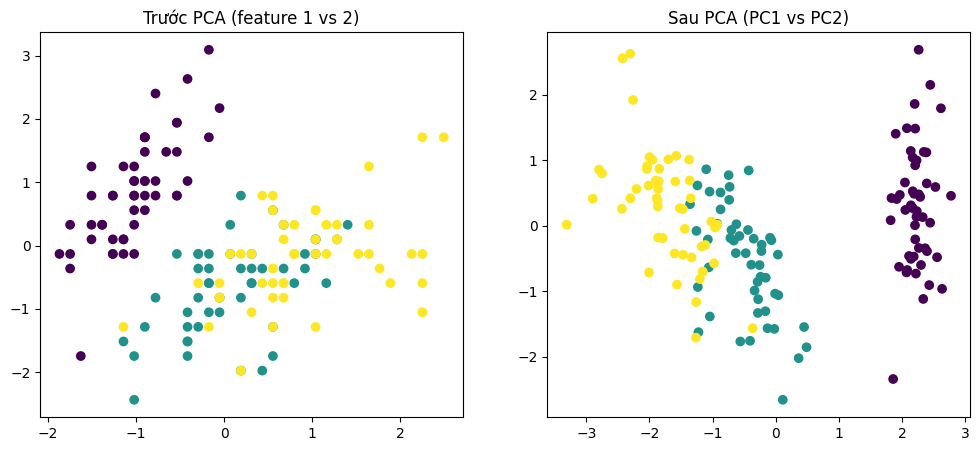

Tỷ lệ phương sai giữ lại cho từng PC:
PC1: 72.96 %
PC2: 22.85 %
PC3: 3.67 %
PC4: 0.52 %

Tổng giữ lại 2 PC đầu: 95.81320720000164 %


In [6]:
#Trực quan hoá
plt.figure(figsize=(12,5))

#Dữ liệu ban đầu
plt.subplot(1,2,1)
plt.title("Trước PCA (feature 1 vs 2)")
plt.scatter(X_std[:,0], X_std[:,1], c=y)

#Dữ liệu sau PCA
plt.subplot(1,2,2)
plt.title("Sau PCA (PC1 vs PC2)")
plt.scatter(Z[:,0], Z[:,1], c=y)

plt.show()

var_explained = eig_vals / np.sum(eig_vals)
print("Tỷ lệ phương sai giữ lại cho từng PC:")
for i,v in enumerate(var_explained):
    print(f"PC{i+1}: {v*100:.2f} %")

print("\nTổng giữ lại 2 PC đầu:", np.sum(var_explained[:2])*100, "%")

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)
Z_sk = pca.fit_transform(X_std)
var_sk = pca.explained_variance_ratio_

So sánh phương sai
Custom PCA: [0.72962445 0.22850762]
Sklearn PCA: [0.72962445 0.22850762]


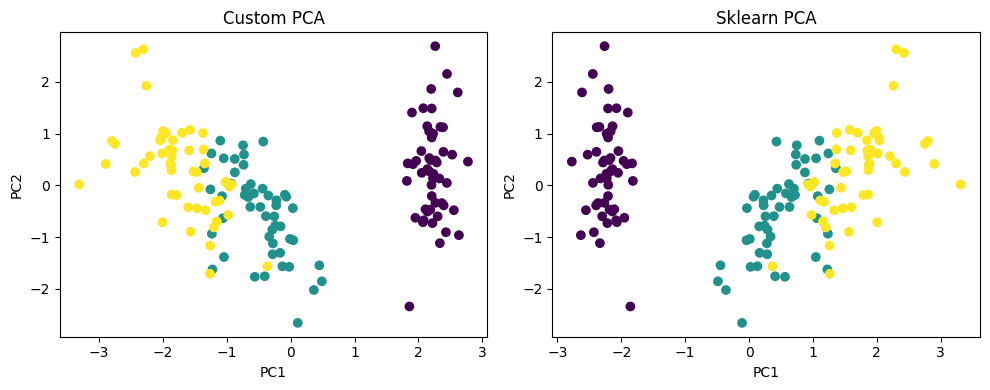

In [9]:
print("So sánh phương sai")
print("Custom PCA:", var_explained[:2])
print("Sklearn PCA:", var_sk)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Custom PCA")
plt.scatter(Z[:,0], Z[:,1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")


plt.subplot(1,2,2)
plt.title("Sklearn PCA")
plt.scatter(Z_sk[:,0], Z_sk[:,1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()